In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Derivatives and Gradient for Optimization

$$f(x) = x^2$$

In [2]:
def f(x): return x**2
x = np.linspace(-2,2,100)
f(x)

array([4.00000000e+00, 3.84001632e+00, 3.68329762e+00, 3.52984389e+00,
       3.37965514e+00, 3.23273135e+00, 3.08907254e+00, 2.94867871e+00,
       2.81154984e+00, 2.67768595e+00, 2.54708703e+00, 2.41975309e+00,
       2.29568411e+00, 2.17488011e+00, 2.05734109e+00, 1.94306703e+00,
       1.83205795e+00, 1.72431385e+00, 1.61983471e+00, 1.51862055e+00,
       1.42067136e+00, 1.32598714e+00, 1.23456790e+00, 1.14641363e+00,
       1.06152433e+00, 9.79900010e-01, 9.01540659e-01, 8.26446281e-01,
       7.54616876e-01, 6.86052444e-01, 6.20752984e-01, 5.58718498e-01,
       4.99948985e-01, 4.44444444e-01, 3.92204877e-01, 3.43230283e-01,
       2.97520661e-01, 2.55076013e-01, 2.15896337e-01, 1.79981635e-01,
       1.47331905e-01, 1.17947148e-01, 9.18273646e-02, 6.89725538e-02,
       4.93827160e-02, 3.30578512e-02, 1.99979594e-02, 1.02030405e-02,
       3.67309458e-03, 4.08121620e-04, 4.08121620e-04, 3.67309458e-03,
       1.02030405e-02, 1.99979594e-02, 3.30578512e-02, 4.93827160e-02,
      

$$f(x,y) = x^2 + y^2$$

$$f_x = 2x$$

$$f_y = 2y$$

Gradient is a vector of partial derivatives so $$< 2x, 2y>$$ The minimum or maximum (depends on a function type) is where both of this partial derivaties = 0

In [3]:
def f(x,y): return x**2+y**2
x = np.linspace(-1,1,100)
y = np.linspace(2,3,100)
f(x,y)

array([ 5.        ,  5.00051015,  5.00204061,  5.00459137,  5.00816243,
        5.0127538 ,  5.01836547,  5.02499745,  5.03264973,  5.04132231,
        5.0510152 ,  5.0617284 ,  5.07346189,  5.08621569,  5.0999898 ,
        5.11478421,  5.13059892,  5.14743394,  5.16528926,  5.18416488,
        5.20406081,  5.22497704,  5.24691358,  5.26987042,  5.29384757,
        5.31884502,  5.34486277,  5.37190083,  5.39995919,  5.42903785,
        5.45913682,  5.4902561 ,  5.52239567,  5.55555556,  5.58973574,
        5.62493623,  5.66115702,  5.69839812,  5.73665952,  5.77594123,
        5.81624324,  5.85756555,  5.89990817,  5.94327109,  5.98765432,
        6.03305785,  6.07948169,  6.12692582,  6.17539027,  6.22487501,
        6.27538006,  6.32690542,  6.37945108,  6.43301704,  6.48760331,
        6.54320988,  6.59983675,  6.65748393,  6.71615141,  6.7758392 ,
        6.83654729,  6.89827569,  6.96102439,  7.02479339,  7.0895827 ,
        7.15539231,  7.22222222,  7.29007244,  7.35894297,  7.42

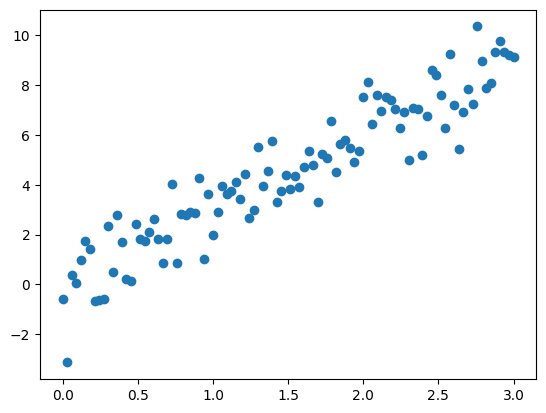

In [4]:
x = np.linspace(0,3,100)
y = 3*x + np.random.normal(size = len(x))
plt.scatter(x,y)

# Perceptron in classification

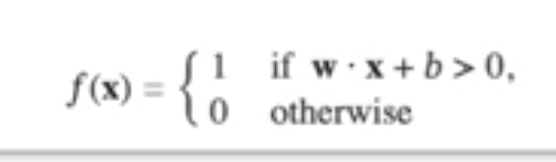

## Data

In [5]:
from sklearn.datasets import make_classification, make_blobs

In [6]:
### make a basic classification dataset
X, y = make_blobs(centers = 2, center_box = [-3,3], random_state = 22)

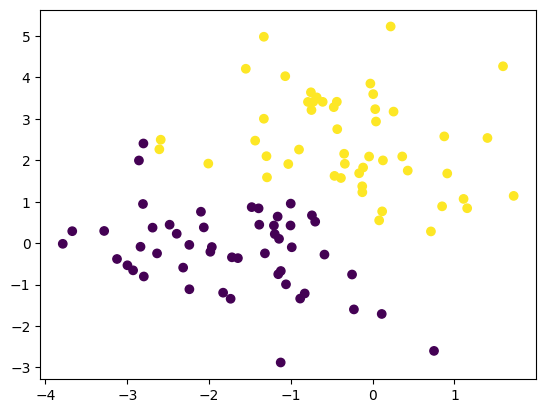

In [7]:
### visualize
plt.scatter(X[:,0],X[:,1],c = y)

Now X have 2 variables x-axis and y_axis. y is just 1 or 0 depending on class

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

In [10]:
y

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

## Train, test split

Let's create test and train set

In [11]:
X_train = X[:75]
X_test = X[75:]
y_train = y[:75]
y_test = y[75:]

## Bias Term

Now we will add bias term. Usually bias term is set to 0 or 1

In [12]:
# Add bias term
ones = np.ones(shape = (75,1))
Xb_train = np.concatenate((ones, X_train), axis = 1)
ones = np.ones(shape = (25,1))
Xb_test = np.concatenate((ones, X_test), axis = 1)
Xb_train.shape, Xb_test.shape

((75, 3), (25, 3))

as we can see we have 75 rows for train set, 25 for test set and 3 features including x, y and bias term

## Initial weights

In [13]:
# initial weights
w = np.array([0,1,2])
w

array([0, 1, 2])

## Weighted sum

we need 3 weights, to be able to multiply by Xb_train matrix

In [14]:
# weighted sum
Xb_train@w

array([ 2.78867625, -3.81911792, -1.30325794, -4.46473719, -3.49635139,
        3.21085792,  4.27632416, -4.2390645 , -0.58037626,  2.84289468,
       -6.88325592, -4.06532259,  2.33250956, -4.21820467, -1.76490513,
        6.99248023, 10.1336195 ,  6.03003677,  6.4813569 ,  1.65182037,
        4.13963501, -2.36894418,  3.9340336 , -2.32294523, -4.44994818,
        6.21135832, -0.49450555, -2.65195173,  0.12332334,  1.83267846,
        2.62821716,  6.35396184,  1.13539062, -3.5607018 ,  6.60715882,
       -2.40174329,  6.1039037 ,  3.49259107, -4.40500531, -0.93467253,
       -1.13907609, -4.41966903,  7.20173202,  3.24832829, -0.35576757,
        0.60213687,  1.92429211,  3.53474904,  5.91427019,  3.96754916,
       -2.46559814,  6.0911813 , -0.91562176, -2.69192771,  4.67694259,
       -0.1499049 ,  6.02815636,  5.67962439,  2.75890499, -3.01022402,
        4.54779174, -3.09311681,  2.01029459, 10.68095967, -3.88823036,
        0.28733484,  1.28021782, -1.59035455,  5.07067857, -1.94

## Activation Function

In [15]:
# make predictions on train data
yhat = np.where(Xb_train@w>0,1,0)

In [16]:
yhat

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0])

We made predictions for train data. Of course this is random just for now, since our weights are not trained and were picked randomly.

For reference below are actual labels

In [17]:
y_train

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0])

## Evaluation

In [18]:
sum(y_train == yhat)/len(y_train)

0.9066666666666666

That's quite good accuracy for random weights

## Improving the model

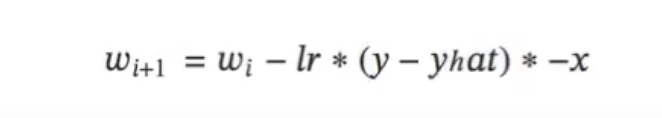

In [19]:
w = w - 0.1 * (y_train - yhat) @ - Xb_train

We set learning rate to 0.1

In [20]:
w

array([-0.7       ,  2.14377096,  1.16169285])

In [21]:
# make prediction and evaluate
sum(np.where(Xb_train@w > 0, 1, 0) == y_train) / len(y_train)

0.9466666666666667

We improved the model by 4%, that's quite nice improvement taking into account that we've used just 1 epoch

## Epochs

In [22]:
# Do the process iteratively

w = np.array([0,1,2])
lr = 0.001
for epoch in range(100):
  # Affine val
  affine_value = Xb_train @ w

  yhat = np.where(affine_value > 0, 1, 0)
  w = w - lr * (y_train - yhat) @ -Xb_train
  print(f'Train Accuracy {sum(yhat == y_train)/len(y_train): .2f} in epoch {epoch}')

  yhat_test = np.where(Xb_test@w > 0, 1, 0)
  print(f'Test Accuracy {sum(yhat_test == y_test)/len(y_test): .2f}\n')

Train Accuracy  0.91 in epoch 0
Test Accuracy  0.96

Train Accuracy  0.91 in epoch 1
Test Accuracy  0.96

Train Accuracy  0.91 in epoch 2
Test Accuracy  0.96

Train Accuracy  0.91 in epoch 3
Test Accuracy  0.96

Train Accuracy  0.91 in epoch 4
Test Accuracy  0.96

Train Accuracy  0.92 in epoch 5
Test Accuracy  0.96

Train Accuracy  0.92 in epoch 6
Test Accuracy  0.96

Train Accuracy  0.92 in epoch 7
Test Accuracy  0.96

Train Accuracy  0.92 in epoch 8
Test Accuracy  0.96

Train Accuracy  0.93 in epoch 9
Test Accuracy  0.96

Train Accuracy  0.93 in epoch 10
Test Accuracy  0.96

Train Accuracy  0.95 in epoch 11
Test Accuracy  0.96

Train Accuracy  0.95 in epoch 12
Test Accuracy  0.96

Train Accuracy  0.95 in epoch 13
Test Accuracy  0.96

Train Accuracy  0.95 in epoch 14
Test Accuracy  0.96

Train Accuracy  0.95 in epoch 15
Test Accuracy  0.96

Train Accuracy  0.95 in epoch 16
Test Accuracy  0.96

Train Accuracy  0.95 in epoch 17
Test Accuracy  0.96

Train Accuracy  0.95 in epoch 18
Test 

In [23]:
yhat_test

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0])

In [24]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0])

In [25]:
yhat_test == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

As we can see we have 100% of correct answers

In [26]:
w

array([-0.235     ,  1.37673361,  1.68865079])

and perfect weights

# Perceptron in Regression

## Data

In [27]:
x = np.random.randint(low = 1, high = 30, size = 15)
y = 3*x + 4 + np.random.normal(size = len(x), scale = 3)

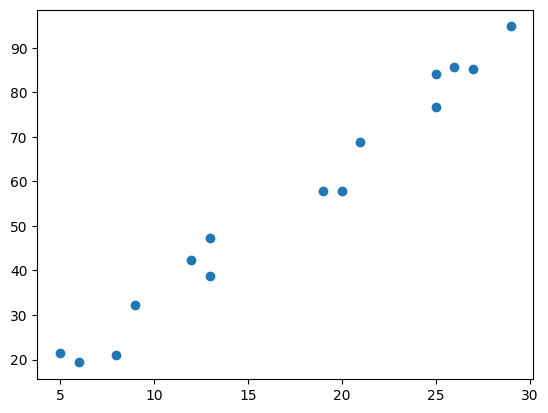

In [28]:
plt.scatter(x,y)

In [29]:
xt = torch.tensor(x)
yt = torch.tensor(y)

In [30]:
xt

tensor([ 5, 12, 13,  6, 25, 19, 20, 21,  9,  8, 25, 26, 13, 29, 27])

In [31]:
yt

tensor([21.4729, 42.2562, 38.8624, 19.3339, 84.1155, 57.8348, 57.8775, 68.8938,
        32.1550, 21.0379, 76.6411, 85.7117, 47.2527, 94.8197, 85.3069],
       dtype=torch.float64)

## Model

In [32]:
# define model
def model(x, w, b):
  return x*w + b

# parameters
w = torch.ones(())
b = torch.zeros(())

w, b

(tensor(1.), tensor(0.))

## Prediction

In [33]:
yhat = model(xt,w,b)
yhat

tensor([ 5., 12., 13.,  6., 25., 19., 20., 21.,  9.,  8., 25., 26., 13., 29.,
        27.])

## Loss

In [34]:
# define loss function
def loss_fn(y, yhat):
  sg_diff = (y-yhat)**2
  return sg_diff.mean()

In [35]:
loss = loss_fn(yt, yhat)
loss

tensor(1773.8901, dtype=torch.float64)

## Updating Weights

In [36]:
#derrivative of loss
def dloss(yhat, y):
  diff_d = 2*(yhat-y)/yhat.size(0)
  return diff_d

In [37]:
#derrivative of model with respect to weights
def dmodel_w(x,w,b):
  return x # this is partial derrivative of model function with respect to w

In [38]:
#derrivative of model with respect to bias
def dmodel_b(x,w,b):
  return 1 # this is partial derivative of model function with respect to b

In [39]:
#gradient function
def grad_func(y,x,yhat,w,b):
  dloss_m = dloss(yhat, y)
  dloss_dw = dloss_m*dmodel_w(x,w,b)
  dloss_db = dloss_m*dmodel_b(x,w,b)
  return torch.stack([dloss_dw.sum(),dloss_db.sum()])

## Training

In [40]:
#training loop
def training_loop(n_epochs, lr, params, x, y):
  for epoch in range(1, n_epochs + 1):
    w, b = params
    yhat = model(x,w,b)
    loss = loss_fn(y, yhat)
    grad = grad_func(y,x,yhat,w,b)
    params = params - lr * grad
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
  return params

In [41]:
# Run
params = training_loop(100, 0.001, torch.tensor([0,0]), xt, yt)
params

Epoch 100, Loss 13.50478598435278


tensor([3.2043, 0.2049], dtype=torch.float64)

## Visualization of model

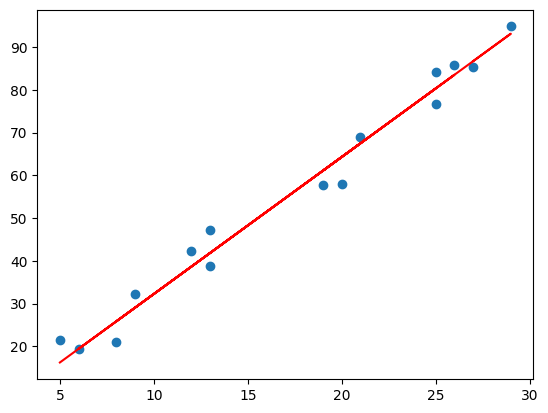

In [42]:
plt.scatter(xt, yt)
plt.plot(xt, params[0]*xt + params[1], color = 'red')

# PyTorch

Using PyTorch for gradient computation

## Model

In [43]:
def model(x,w,b):
  return x*w + b

In [44]:
def loss_fn(y, yhat):
  diff_sq = (y-yhat)**2
  return diff_sq.sum()

In [45]:
# parameters
params = torch.tensor([1.0,0.0], requires_grad = True)
params

tensor([1., 0.], requires_grad=True)

## Loss

In [46]:
loss = loss_fn(yt, model(xt, *params))
loss

tensor(26608.3517, dtype=torch.float64, grad_fn=<SumBackward0>)

## Gradient

In [47]:
params.grad

In [48]:
params.grad is None

True

For now params gradient doesn't exisit since we haven't initiated backward operation for loss. Let's do it now.

In [49]:
# backward method
loss.backward()

backward count gradient for parameters, meaning derivative of model function with respect to weights and then with respect to bias

In [50]:
# gradient
params.grad

tensor([-23850.5820,  -1151.1436])

Gradient accumulates! Thus, we need to zero out the gradient after each backward function call

In [51]:
if params.grad is not None:
  params.grad.zero_()

## Training

In [52]:
def training_loop(n_epochs, lr, params, x, y):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_() # zero the gradient
    yhat = model(x, *params)
    loss = loss_fn(y, yhat)
    loss.backward()
    with torch.no_grad():
      params -= lr * params.grad
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
  return params

In [53]:
params = training_loop(5000, 1e-4, torch.tensor([1.0,0.0], requires_grad = True), xt, yt)
params

Epoch 100, Loss 202.72932643889283
Epoch 200, Loss 202.17022110392554
Epoch 300, Loss 201.66712084478797
Epoch 400, Loss 201.2144215608032
Epoch 500, Loss 200.8068764670564
Epoch 600, Loss 200.44017525854454
Epoch 700, Loss 200.1102637790479
Epoch 800, Loss 199.81326502506693
Epoch 900, Loss 199.54602575699715
Epoch 1000, Loss 199.30556493642462
Epoch 1100, Loss 199.0889775900192
Epoch 1200, Loss 198.89426609292272
Epoch 1300, Loss 198.71892700156263
Epoch 1400, Loss 198.56127401411206
Epoch 1500, Loss 198.41932514111696
Epoch 1600, Loss 198.29145499804488
Epoch 1700, Loss 198.1765953318649
Epoch 1800, Loss 198.07304122832494
Epoch 1900, Loss 197.97993460520408
Epoch 2000, Loss 197.8961413213714
Epoch 2100, Loss 197.82070551951833
Epoch 2200, Loss 197.7528252236232
Epoch 2300, Loss 197.69177489912855
Epoch 2400, Loss 197.63679538610438
Epoch 2500, Loss 197.58740738593852
Epoch 2600, Loss 197.54285603799684
Epoch 2700, Loss 197.50275487020042
Epoch 2800, Loss 197.46670931936512
Epoch 29

tensor([3.1409, 1.5284], requires_grad=True)

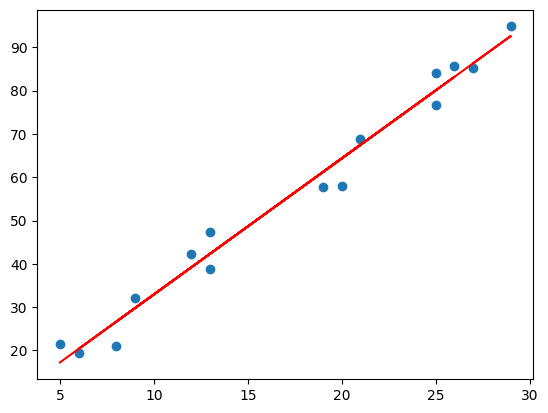

In [54]:
plt.scatter(xt, yt)
plt.plot(xt, xt*float(params[0])+float(params[1]), color = 'red')

# PyTorch - nn.Sequential and nn.Linear

In [55]:
import torch.nn as nn
import torch.optim as optim

## Linear Model

Linear object creates intercept and slope, so we don't have to create function by ourselfes.

In [56]:
# Linear layer
linear_1 = nn.Linear(in_features = 1, out_features = 1)

It will randomly initialize weight and bias as well.

In [57]:
# parameters
list(linear_1.parameters())

[Parameter containing:
 tensor([[0.3253]], requires_grad=True),
 Parameter containing:
 tensor([0.1197], requires_grad=True)]

Let's change type of xt to float32

In [58]:
xt = torch.tensor(xt, dtype = torch.float32)

<ipython-input-58-fdb0b0c2c4a7>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xt = torch.tensor(xt, dtype = torch.float32)


## Prediction

Let's predict an outcome for one xt value

In [61]:
xt

tensor([ 5., 12., 13.,  6., 25., 19., 20., 21.,  9.,  8., 25., 26., 13., 29.,
        27.])

In [62]:
xt[0]

tensor(5.)

In [63]:
xt[0].reshape(-1,1)

tensor([[5.]])

In [64]:
linear_1(xt[0].reshape(-1,1))

tensor([[1.7461]], grad_fn=<AddmmBackward0>)

Let's predict outcome for whole training set

In [65]:
linear_1(xt.unsqueeze(1))

tensor([[1.7461],
        [4.0230],
        [4.3483],
        [2.0713],
        [8.2516],
        [6.2999],
        [6.6252],
        [6.9505],
        [3.0472],
        [2.7219],
        [8.2516],
        [8.5768],
        [4.3483],
        [9.5527],
        [8.9021]], grad_fn=<AddmmBackward0>)

## Loss

Let's count loss for our weights

In [66]:
loss_fn = nn.MSELoss()

first we need to change data type of y_train into float32

In [67]:
yt = torch.tensor(yt, dtype = torch.float32)

<ipython-input-67-d9193dd7f66d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yt = torch.tensor(yt, dtype = torch.float32)


In [68]:
loss = loss_fn(yt[0], linear_1(xt[0].reshape(-1,1)))
loss

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(389.1468, grad_fn=<MseLossBackward0>)

## Optimizer

In [69]:
optimizer = optim.SGD(linear_1.parameters(), lr = 0.1)

In [70]:
optimizer.zero_grad()

Now we need to initialize backward method on loss

In [71]:
loss.backward()

In [72]:
list(linear_1.parameters()) # original parameters

[Parameter containing:
 tensor([[0.3253]], requires_grad=True),
 Parameter containing:
 tensor([0.1197], requires_grad=True)]

In [73]:
optimizer.step() # udpate parameters with SGD